Knowledge about the data 
Creatinine: a protein that is often used as an indicator of kidney function.
YVLE1: lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
REG1B: a protein that may be associated with pancreas regeneration
TFF1: trefoil factor 1, which may be related to regeneration and repair of the urinary tract


In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px


In [2]:
df = pd.read_csv("Debernardi et al 2020 data.csv")
df.head(5)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [3]:
df.shape

(590, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

Stage, Benign Sample Diagnosis, Plasma_CA19_9, REG1A have null values

In [5]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_nan

['stage', 'benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A']

Getting Rid of Extra Columns

In [6]:
df1 = df.drop(columns = ['stage', 'benign_sample_diagnosis', 'sample_id', 'patient_cohort', 'sample_origin', 'sex', 'age', 'diagnosis'])

In [7]:
methods = {
    'median': lambda df1: df1.fillna(df1.median()),
    'mean': lambda df1: df1.fillna(df1.mean()),
    'linear': lambda df1: df1.interpolate(method='linear'),
    'cubic': lambda df1: df1.interpolate(method='cubic')
}

results = {}

for method_name, method_func in methods.items():
    df_method = df1.copy()
    df_method[['plasma_CA19_9', 'REG1A']] = method_func(df_method[['plasma_CA19_9', 'REG1A']])
    results[method_name] = df_method

df_median = results['median']
df_mean = results['mean']
df_linear = results['linear']
df_cubic = results['cubic']

In [8]:
df_median.head()

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000
1,26.5,0.97266,2.037585,94.46703,209.488250,228.4070
2,7.0,0.78039,0.145589,102.36600,461.141000,208.5385
3,8.0,0.70122,0.002805,60.57900,142.950000,208.5385
4,9.0,0.21489,0.000860,65.54000,41.088000,208.5385


In [9]:
df_mean.head()

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [10]:
df_linear.head()

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,11.70,1.83222,0.893219,52.94884,654.282174,1262.000000
1,9.35,0.97266,2.037585,94.46703,209.488250,228.407000
2,7.00,0.78039,0.145589,102.36600,461.141000,253.603727
3,8.00,0.70122,0.002805,60.57900,142.950000,278.800455
4,9.00,0.21489,0.000860,65.54000,41.088000,303.997182


In [11]:
df_cubic.head()

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,7.705366,0.97266,2.037585,94.46703,209.488250,228.407000
2,7.000000,0.78039,0.145589,102.36600,461.141000,-519.436578
3,8.000000,0.70122,0.002805,60.57900,142.950000,-1014.316073
4,9.000000,0.21489,0.000860,65.54000,41.088000,-1289.016827


Comparing methods of replacing missing data values, won't be using cubic interpolation because it returned negative values.

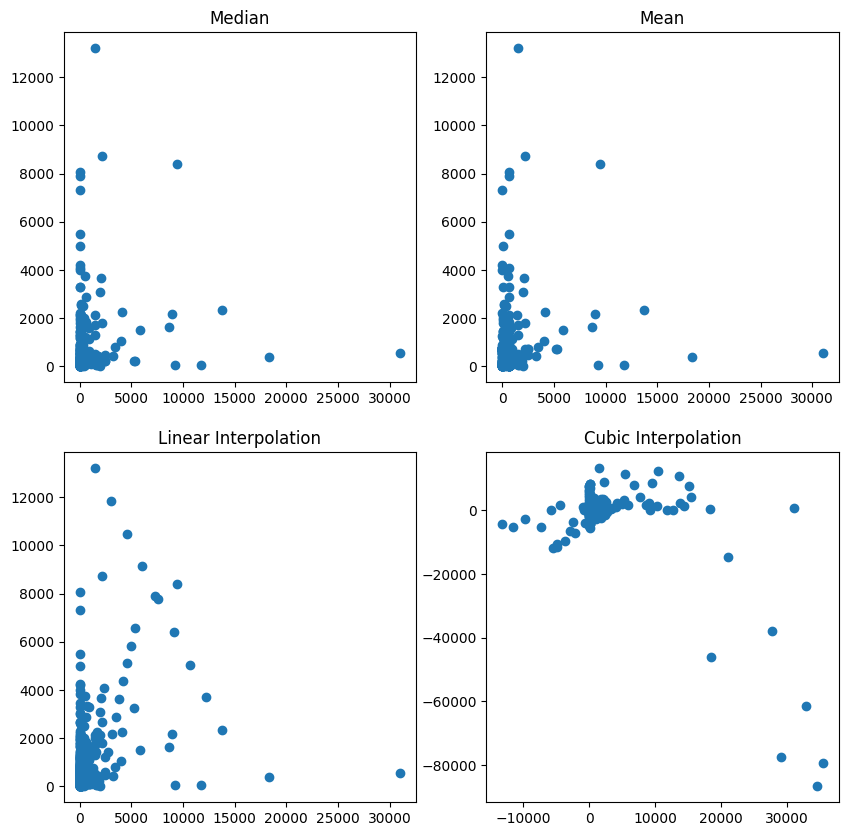

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].set_title('Median')
axs[0, 0].scatter(df_median['plasma_CA19_9'], df_median['REG1A'])
axs[0, 1].set_title('Mean')
axs[0, 1].scatter(df_mean['plasma_CA19_9'], df_mean['REG1A'])
axs[1, 0].set_title('Linear Interpolation')
axs[1, 0].scatter(df_linear['plasma_CA19_9'], df_linear['REG1A'])
axs[1, 1].set_title('Cubic Interpolation')
axs[1, 1].scatter(df_cubic['plasma_CA19_9'], df_cubic['REG1A'])

plt.show()

In [14]:
len(df['diagnosis'].unique())

3

In [15]:
print(df['diagnosis'].unique())

[1 2 3]


1 = Healthy 
2 = Non-Cancerous Pancreas Condition
3 = Pancreatic Cancer

In [16]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    #df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    #if df.shape[1] < 2:
    #    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
    #    return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

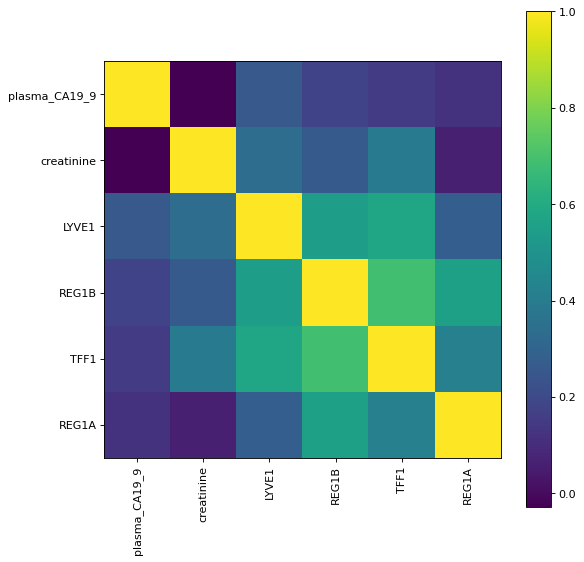

In [17]:
plotCorrelationMatrix(df1, 8)

Most Correlated seem to be REG1B and TFF1

In [19]:
x_median = df_median
x_mean = df_mean
x_lin_interp = df_linear
x_cubic_interp = df_cubic

y = df['diagnosis']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_median, y, random_state=42, test_size = 0.25, stratify = y)

In [22]:
print(X_train.shape)
print(X_test.shape)

(442, 6)
(148, 6)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def model_train_test(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    sensitivity = recall_score(y_test, y_pred, average = 'weighted', pos_label=1)
    
    print("Accuracy: {:.3f}".format(accuracy))
    print("F1 score: {:.3f}".format(f1))
    print("Recall: {:.3f}".format(recall))
    print("Sensitivity: {:.3f}".format(sensitivity))
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

In [25]:
from sklearn import svm
clf = svm.SVC()
SVM = clf.fit(X_train_scaled, y_train)

score = SVM.score(X_test_scaled, y_test)
print('Test set score: {}'.format(score))

Test set score: 0.6351351351351351


Accuracy: 0.669
F1 score: 0.657
Recall: 0.669
Sensitivity: 0.669
              precision    recall  f1-score   support

           1       0.59      0.87      0.70        46
           2       0.57      0.38      0.46        52
           3       0.87      0.78      0.82        50

    accuracy                           0.67       148
   macro avg       0.68      0.68      0.66       148
weighted avg       0.68      0.67      0.66       148



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^

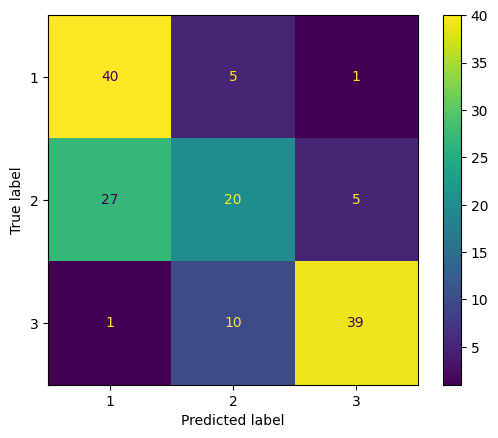

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy: 0.574
F1 score: 0.545
Recall: 0.574
Sensitivity: 0.574
              precision    recall  f1-score   support

           1       0.51      0.78      0.62        46
           2       0.41      0.21      0.28        52
           3       0.75      0.76      0.75        50

    accuracy                           0.57       148
   macro avg       0.56      0.58      0.55       148
weighted avg       0.55      0.57      0.54       148



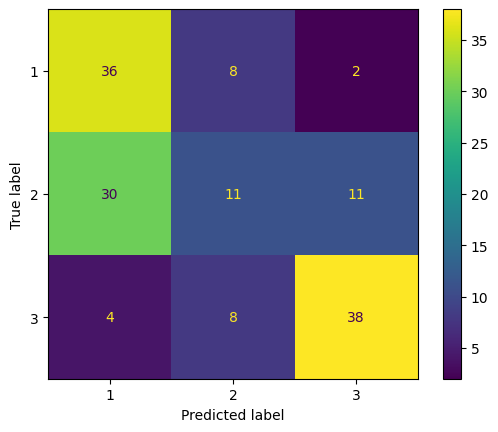

Accuracy: 0.486
F1 score: 0.446
Recall: 0.486
Sensitivity: 0.486
              precision    recall  f1-score   support

           1       0.47      0.93      0.62        46
           2       0.21      0.12      0.15        52
           3       0.82      0.46      0.59        50

    accuracy                           0.49       148
   macro avg       0.50      0.50      0.45       148
weighted avg       0.50      0.49      0.45       148



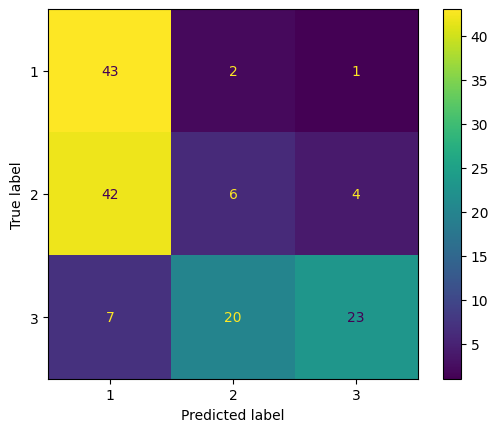

In [27]:
#Gaussian Naive Bayes & Bernoulli Naive Bayes - simple classifiers
from sklearn.naive_bayes import GaussianNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()

model_train_test(bnb, X_train_scaled, X_test_scaled, y_train, y_test)
model_train_test(gnb, X_train_scaled, X_test_scaled, y_train, y_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


Accuracy: 0.649
F1 score: 0.632
Recall: 0.649
Sensitivity: 0.649
              precision    recall  f1-score   support

           1       0.61      0.78      0.69        46
           2       0.58      0.37      0.45        52
           3       0.73      0.82      0.77        50

    accuracy                           0.65       148
   macro avg       0.64      0.66      0.64       148
weighted avg       0.64      0.65      0.63       148



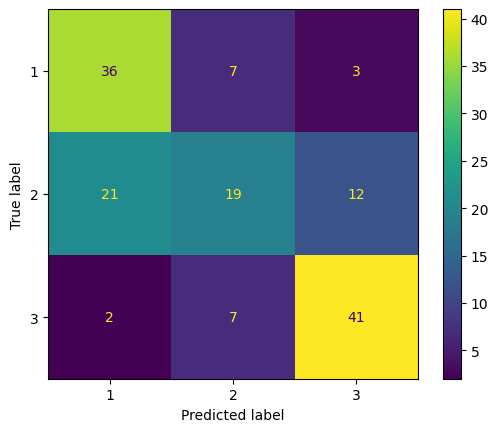

In [29]:
model_train_test(KNeighborsClassifier(n_neighbors=18), X_train_scaled, X_test_scaled, y_train, y_test)

In [30]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(x_mean, y, random_state=42, test_size = 0.25, stratify = y)
scaler=StandardScaler()
X_train_scaled_mean=scaler.fit_transform(X_train_mean)
X_test_scaled_mean=scaler.transform(X_test_mean)

In [31]:
clf = svm.SVC()
SVM = clf.fit(X_train_scaled_mean, y_train_mean)

score = SVM.score(X_test_scaled_mean, y_test_mean)
print('Test set score: {}'.format(score))

Test set score: 0.6351351351351351


Accuracy: 0.662
F1 score: 0.649
Recall: 0.662
Sensitivity: 0.662
              precision    recall  f1-score   support

           1       0.63      0.87      0.73        46
           2       0.61      0.42      0.50        52
           3       0.73      0.72      0.73        50

    accuracy                           0.66       148
   macro avg       0.66      0.67      0.65       148
weighted avg       0.66      0.66      0.65       148



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^

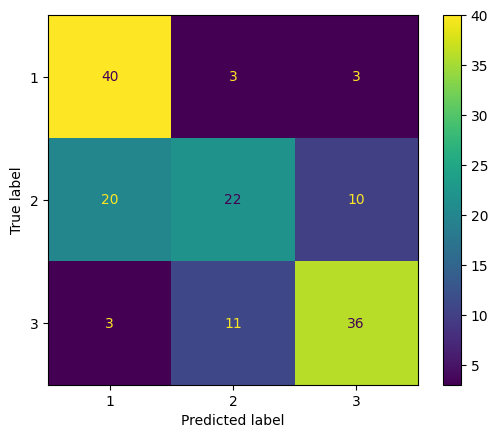

In [32]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv, X_train_scaled_mean, X_test_scaled_mean, y_train_mean, y_test_mean)

Accuracy: 0.554
F1 score: 0.528
Recall: 0.554
Sensitivity: 0.554
              precision    recall  f1-score   support

           1       0.51      0.78      0.62        46
           2       0.37      0.21      0.27        52
           3       0.73      0.70      0.71        50

    accuracy                           0.55       148
   macro avg       0.54      0.56      0.53       148
weighted avg       0.54      0.55      0.53       148



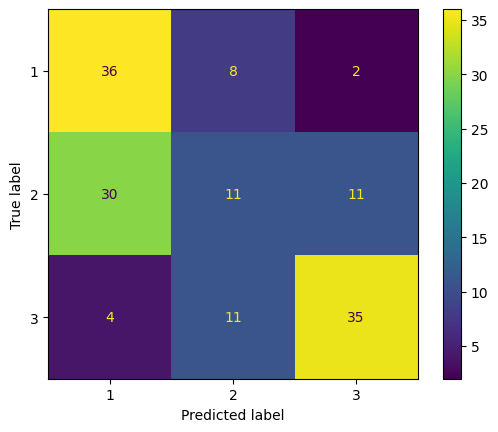

Accuracy: 0.500
F1 score: 0.478
Recall: 0.500
Sensitivity: 0.500
              precision    recall  f1-score   support

           1       0.45      0.87      0.60        46
           2       0.36      0.23      0.28        52
           3       0.81      0.44      0.57        50

    accuracy                           0.50       148
   macro avg       0.54      0.51      0.48       148
weighted avg       0.54      0.50      0.48       148



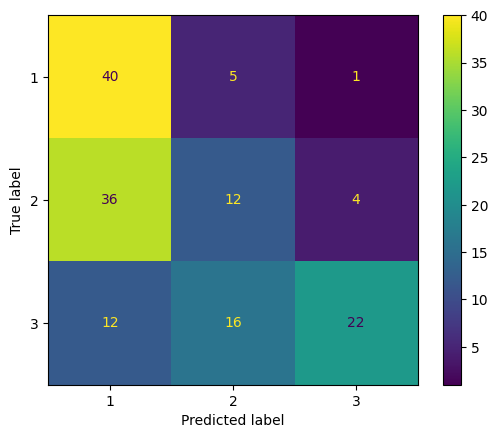

In [33]:
gnb=GaussianNB()
bnb=BernoulliNB()

model_train_test(bnb, X_train_scaled_mean, X_test_scaled_mean, y_train_mean, y_test_mean)
model_train_test(gnb, X_train_scaled_mean, X_test_scaled_mean, y_train_mean, y_test_mean)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.578 total time=   0.0s
[CV 2/10] END ....................n_neighbors=1;, score=0.533 total time=   0.0s
[CV 3/10] END ....................n_neighbors=1;, score=0.705 total time=   0.0s
[CV 4/10] END ....................n_neighbors=1;, score=0.727 total time=   0.0s
[CV 5/10] END ....................n_neighbors=1;, score=0.568 total time=   0.0s
[CV 6/10] END ....................n_neighbors=1;, score=0.568 total time=   0.0s
[CV 7/10] END ....................n_neighbors=1;, score=0.636 total time=   0.0s
[CV 8/10] END ....................n_neighbors=1;, score=0.614 total time=   0.0s
[CV 9/10] END ....................n_neighbors=1;, score=0.636 total time=   0.0s
[CV 10/10] END ...................n_neighbors=1;, score=0.568 total time=   0.0s
[CV 1/10] END ....................n_neighbors=2;, score=0.533 total time=   0.0s
[CV 2/10] END ....................n_neighbors=

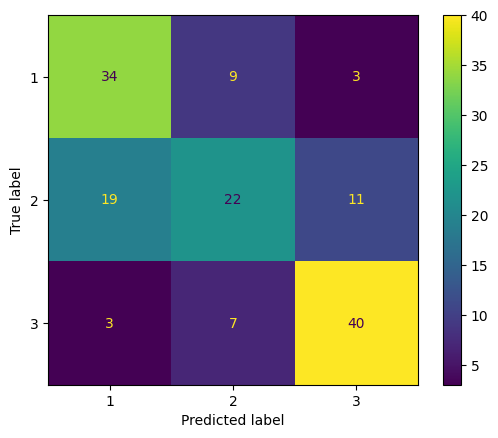

In [34]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=3)
grid_search=grid.fit(X_train_scaled_mean, y_train_mean)
model_train_test(KNeighborsClassifier(n_neighbors=18), X_train_scaled_mean, X_test_scaled_mean, y_train_mean, y_test_mean)

In [35]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin_interp, y, random_state=42, test_size = 0.25, stratify = y)
scaler=StandardScaler()
X_train_scaled_lin=scaler.fit_transform(X_train_lin)
X_test_scaled_lin=scaler.transform(X_test_lin)

In [36]:
clf = svm.SVC()
SVM = clf.fit(X_train_scaled_lin, y_train_lin)

score = SVM.score(X_test_scaled_lin, y_test_lin)
print('Test set score: {}'.format(score))

Test set score: 0.6824324324324325


Accuracy: 0.750
F1 score: 0.747
Recall: 0.750
Sensitivity: 0.750
              precision    recall  f1-score   support

           1       0.68      0.89      0.77        46
           2       0.67      0.56      0.61        52
           3       0.91      0.82      0.86        50

    accuracy                           0.75       148
   macro avg       0.76      0.76      0.75       148
weighted avg       0.76      0.75      0.75       148



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^

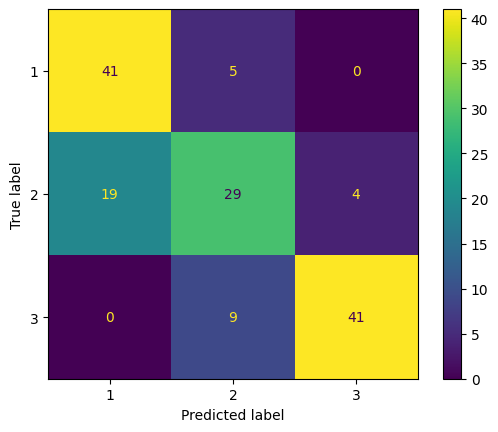

In [37]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv, X_train_scaled_lin, X_test_scaled_lin, y_train_lin, y_test_lin)

Accuracy: 0.669
F1 score: 0.665
Recall: 0.669
Sensitivity: 0.669
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        46
           2       0.60      0.46      0.52        52
           3       0.88      0.72      0.79        50

    accuracy                           0.67       148
   macro avg       0.69      0.68      0.67       148
weighted avg       0.69      0.67      0.67       148



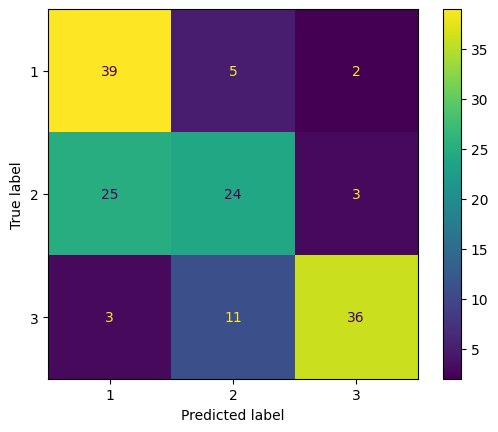

Accuracy: 0.628
F1 score: 0.616
Recall: 0.628
Sensitivity: 0.628
              precision    recall  f1-score   support

           1       0.59      0.93      0.72        46
           2       0.47      0.37      0.41        52
           3       0.89      0.62      0.73        50

    accuracy                           0.63       148
   macro avg       0.65      0.64      0.62       148
weighted avg       0.65      0.63      0.62       148



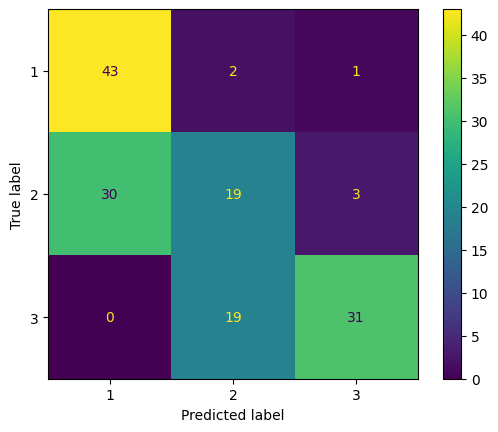

In [38]:
gnb=GaussianNB()
bnb=BernoulliNB()

model_train_test(bnb, X_train_scaled_lin, X_test_scaled_lin, y_train_lin, y_test_lin)
model_train_test(gnb, X_train_scaled_lin, X_test_scaled_lin, y_train_lin, y_test_lin)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.556 total time=   0.0s
[CV 2/10] END ....................n_neighbors=1;, score=0.489 total time=   0.0s
[CV 3/10] END ....................n_neighbors=1;, score=0.636 total time=   0.0s
[CV 4/10] END ....................n_neighbors=1;, score=0.705 total time=   0.0s
[CV 5/10] END ....................n_neighbors=1;, score=0.727 total time=   0.0s
[CV 6/10] END ....................n_neighbors=1;, score=0.545 total time=   0.0s
[CV 7/10] END ....................n_neighbors=1;, score=0.591 total time=   0.0s
[CV 8/10] END ....................n_neighbors=1;, score=0.568 total time=   0.0s
[CV 9/10] END ....................n_neighbors=1;, score=0.659 total time=   0.0s
[CV 10/10] END ...................n_neighbors=1;, score=0.568 total time=   0.0s
[CV 1/10] END ....................n_neighbors=2;, score=0.533 total time=   0.0s
[CV 2/10] END ....................n_neighbors=

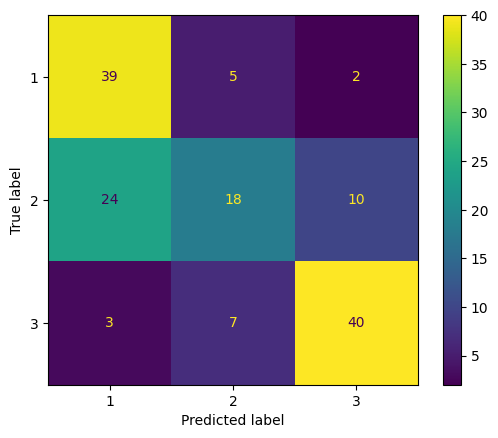

In [39]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=3)
grid_search=grid.fit(X_train_scaled_lin, y_train_lin)
model_train_test(KNeighborsClassifier(n_neighbors=18), X_train_scaled_lin, X_test_scaled_lin, y_train_lin, y_test_lin)